# Laboratorio 1: Regresión en California

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "California Housing dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [195]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [196]:
from sklearn.datasets import fetch_california_housing
X_california, y_california = fetch_california_housing(return_X_y=True, as_frame=True)
california = fetch_california_housing()

In [197]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [198]:
print(california['DESCR'])  # descripción del dataset
#california['feature_names'] # nombres de los atributos para cada columna de 'data'
#california['data']           # matriz con los datos de entrada (atributos)
#print(california['target']) # vector de valores a predecir

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [199]:
california['data'].shape, california['target'].shape

((20640, 8), (20640,))

In [200]:
X_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [201]:
y_california.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [202]:
X_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
dtypes: float64(8)
memory usage: 1.3 MB


In [203]:
X_california.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


/home/ataverna/miniconda3/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  This is separate from the ipykernel package so we can avoid doing imports until


array([<AxesSubplot:title={'center':'AveBedrms'}>,
       <AxesSubplot:title={'center':'AveOccup'}>,
       <AxesSubplot:title={'center':'AveRooms'}>,
       <AxesSubplot:title={'center':'HouseAge'}>,
       <AxesSubplot:title={'center':'Latitude'}>,
       <AxesSubplot:title={'center':'Longitude'}>,
       <AxesSubplot:title={'center':'MedInc'}>,
       <AxesSubplot:title={'center':'Population'}>], dtype=object)

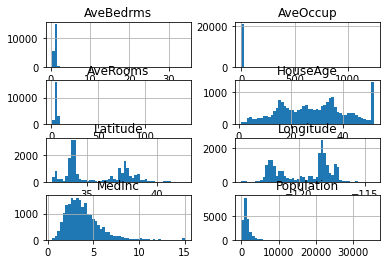

In [204]:
#%matplotlib inline
fig, axes = plt.subplots(nrows=4, ncols=2, constrained_layout=True)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
X_california.hist(bins=50, figsize=(20,15),ax=axes) 

<AxesSubplot:>

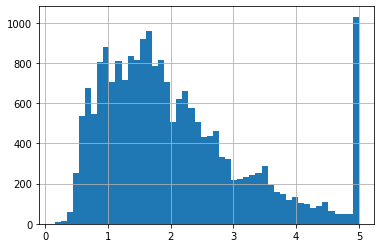

In [205]:
y_california.hist(bins=50)

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [206]:
from sklearn.model_selection import train_test_split
X, y = california['data'], california['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [207]:
y.shape

(20640,)

In [208]:
y_test.shape

(4128,)

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

1. ¿De qué se trata el conjunto de datos?

*El conjunto de datos contiene los registros del censo estadounidense de 1990 para el estado de California. Cada fila representa los valores obtenidos para cada bloque censal determinado por el Bourou de censos de ese país.*
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

*La variable objetivo a predecir es **MedHouseVal** el valor medio de vivienda para cada bloque, expresado en cientos de miles de dólares ($100,000).
Representa el promedio del valor monetario asociado a cada unidad habitacional en dicho bloque.*

3. ¿Qué información (atributos) hay disponibles para hacer la predicción?

*Existen 8 atributos disponibles para realizar la predicción.*


*  **MedInc**        : ingreso medio del bloque
*  **HouseAge**      : antigüedad media de las viviendas en el bloque
*  **AveRooms**      : nro promedio de habitaciones por vivienda
*  **AveBedrms**     : nro promedio de dormitorios por vivienda
*  **Population**    : población del bloque
*  **AveOccup**      : nro promedio de habitantes por vivienda
*  **Latitude**      : latitud geográfica del bloque
*  **Longitude**     : longitud geográfica del bloque



4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?

*A priori se determinan los siguientres atributos como los más relevantes para realizar la predicción:*

* **MedInc** : Porque suele ser un determinante de la case económica.
* **HouseAge** : Porque la edad de un inmueble afecta su valor de mercado.
* **AveRooms** : Porque es un indicativo del tamaño del inmueble.

5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

*Se observan algunos problemas con el dataset después de realizar esta inspección preliminar.*
* No existe una medida de superficie promedio de las viviendas
* No existe una medida de superficie total del bloque censado
* Hoteles y Edificios de departamentos podrían confundir la predicción, ya que agregan valores atípicos en cantidad de habitantes por vivienda.

Necesitamos predecir preicio de casas en california.
(Ver *escala* de los graficos para ver mejor y elegir que datos usar.)

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

In [209]:
california['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [210]:
california['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

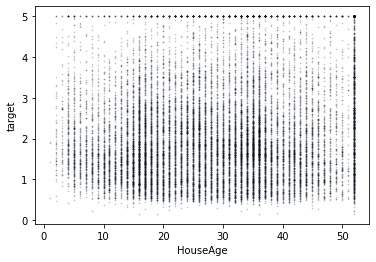

In [211]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'HouseAge'
#selector = california['feature_names'].index(feature)

selector = (np.array(california['feature_names']) == 'HouseAge')
plt.scatter(X[:, selector], y, s=0.5, facecolor="dodgerblue", edgecolor="k", alpha=0.2)
#plt.title(feature)
plt.xlabel(feature)
plt.ylabel('target')
plt.show()

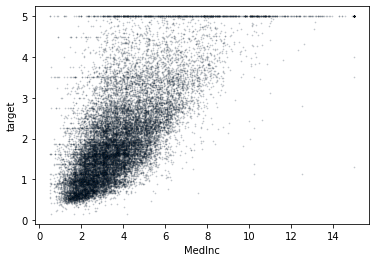

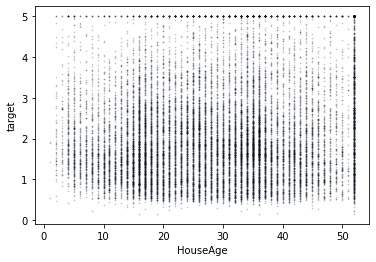

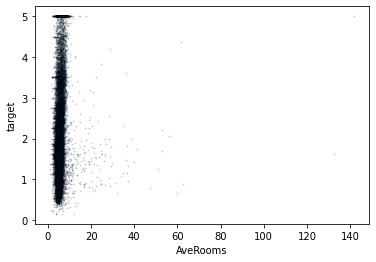

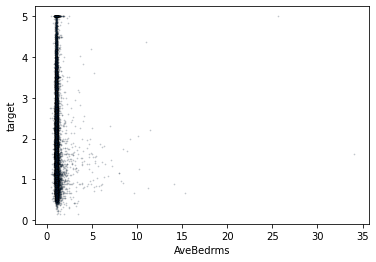

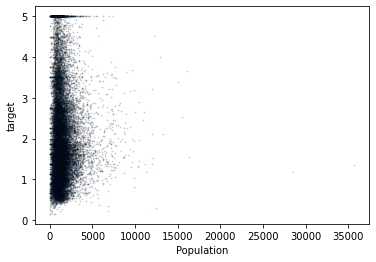

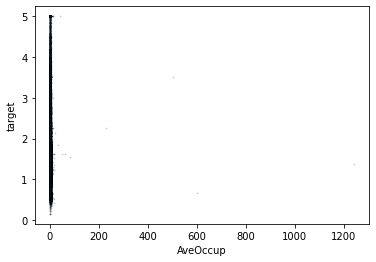

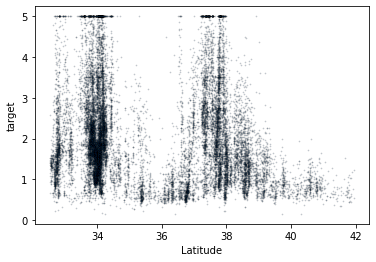

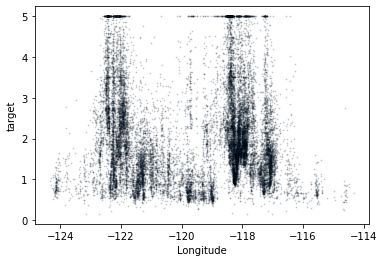

In [212]:
for feature in california['feature_names']:
    selector = (np.array(california['feature_names']) == feature)
    plt.scatter(X[:,selector], y, s=0.5, facecolor="dodgerblue", edgecolor="k", alpha=0.2, label='datos')

    plt.xlabel(feature)
    plt.ylabel('target')
    plt.show()

El atributo que esta mas correlacionado a la variable objetivo es `MedInc`.

El atributo `MedInc` parece ser el mas importante. El resto de los atributos no parece relacionarse directamente con la variable target, aunque para los atributos de `Latitude` y `Longitude`, existe alguna correlacion. 

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [213]:
# 1. Resolver acá. Ayuda:
#feature = 'HouseAge'  # selecciono el atributo 'HouseAge'
feature = 'MedInc' 
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) ==  feature)

X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((16512, 1), (4128, 1))

In [214]:
X_train_f[1]

array([4.3898])

In [215]:
# 2. Instanciar y entrenar acá.
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_f, y_train)

LinearRegression()

In [216]:
# 3. Predecir y evaluar acá.
y_train_f_predict = lr.predict(X_train_f)

#test
y_test_f_predict = lr.predict(X_test_f)

In [217]:
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_train_f_predict)
test_error = mean_squared_error(y_test, y_test_f_predict)
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 0.696068
Test error: 0.721498


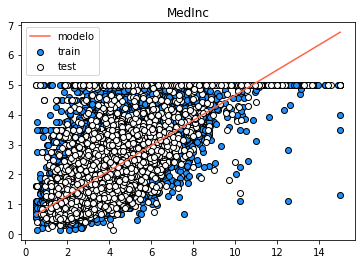

In [218]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, lr.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

El error del conjunto de entrenamiento es 0.69, mientras que el error del conjunto de test es 0.72
A pesar que hay una tendencia lineal, hay valores de y_predict que se alejan bastante del valor real y, para un dado valor de X.

Algo importante que podemos ibservar, es que no hay overfitting ya que los errores son similares.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [219]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


Coeficientes polinomio de grado 1: [0.         0.42032178]
Error Train: 0.8343069638431359
Error Test: 0.8494105152406934


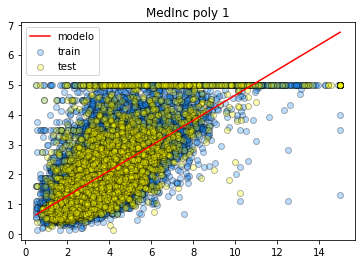

Coeficientes polinomio de grado 2: [ 0.          0.53878506 -0.0108915 ]
Error Train: 0.8303528889782644
Error Test: 0.8469990676455047


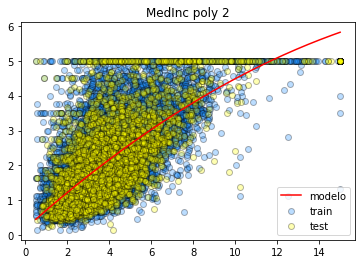

Coeficientes polinomio de grado 3: [ 0.          0.14466063  0.06197842 -0.00362023]
Error Train: 0.8235375424478714
Error Test: 0.8415078962002881


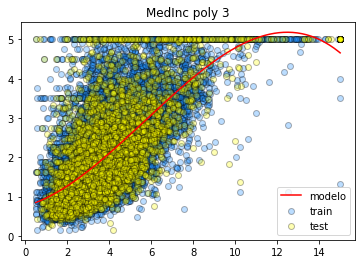

Coeficientes polinomio de grado 4: [ 0.          0.03999366  0.09260212 -0.00697417  0.0001183 ]
Error Train: 0.8234390601553999
Error Test: 0.8414529867509859


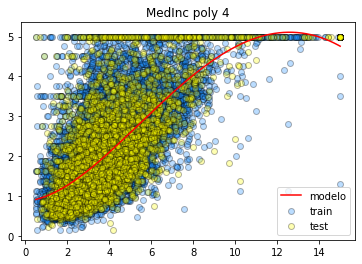

Coeficientes polinomio de grado 5: [ 0.00000000e+00  1.55431499e-01  4.46794842e-02  1.55432096e-03
 -5.45046978e-04  1.84071666e-05]
Error Train: 0.8234105963495097
Error Test: 0.8414109768244904


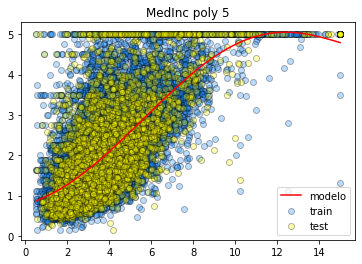

Coeficientes polinomio de grado 6: [ 0.00000000e+00 -1.19693003e+00  7.89003247e-01 -1.87809468e-01
  2.34013760e-02 -1.43356808e-03  3.34928095e-05]
Error Train: 0.8222453691247238
Error Test: 0.8406948779950044


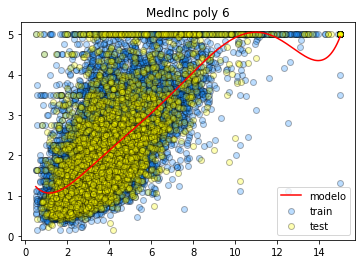

Coeficientes polinomio de grado 7: [ 0.00000000e+00 -3.86678059e+00  2.64748163e+00 -8.13773023e-01
  1.35741328e-01 -1.23560288e-02  5.73928974e-04 -1.06278047e-05]
Error Train: 0.8208016305818732
Error Test: 0.8382100617547549


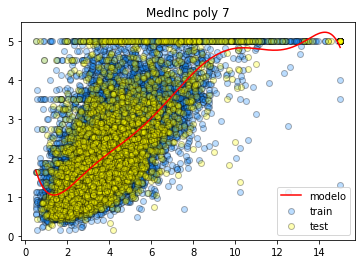

Coeficientes polinomio de grado 8: [ 0.00000000e+00 -5.06409280e+00  3.67420077e+00 -1.25355695e+00
  2.40667760e-01 -2.68623728e-02  1.72403539e-03 -5.89818326e-05
  8.33387053e-07]
Error Train: 0.8207024601063364
Error Test: 0.8379163241318572


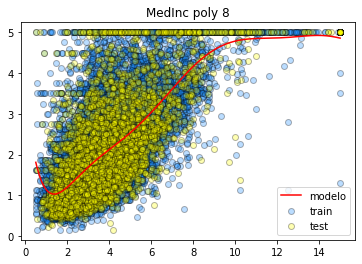

Coeficientes polinomio de grado 9: [ 0.00000000e+00 -4.84397516e+00  3.44931454e+00 -1.13599645e+00
  2.05339911e-01 -2.04352608e-02  1.00710786e-03 -1.11930070e-05
 -9.09522047e-07  2.67007890e-08]
Error Train: 0.8207011034274057
Error Test: 0.8378980303715492


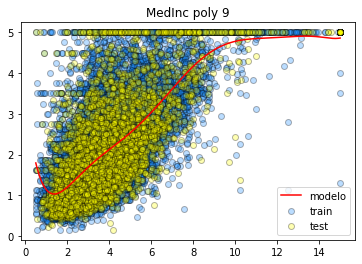

Coeficientes polinomio de grado 10: [ 0.00000000e+00 -1.29318757e+00 -7.87277237e-01  1.49650854e+00
 -7.55977341e-01  1.98380181e-01 -3.08235260e-02  2.94115437e-03
 -1.69480757e-04  5.41718053e-06 -7.37774863e-08]
Error Train: 0.8205692059829823
Error Test: 0.8380927894889869


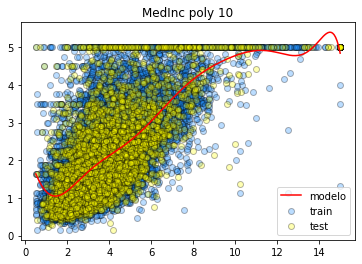

Coeficientes polinomio de grado 11: [ 0.00000000e+00  2.24183572e+00 -5.65013270e+00  5.03504957e+00
 -2.29699877e+00  6.26201669e-01 -1.08995732e-01  1.24346709e-02
 -9.26675774e-04  4.34602130e-05 -1.16398756e-06  1.35711254e-08]
Error Train: 0.8205146613413151
Error Test: 0.8384127736828872


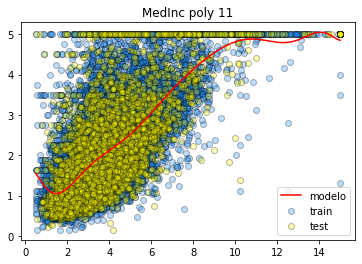

Coeficientes polinomio de grado 12: [ 0.00000000e+00 -1.46640529e+00 -2.59801133e-01  8.10897071e-01
 -2.75291827e-01 -4.72812546e-03  2.40842900e-02 -6.85342120e-03
  9.94265809e-04 -8.55708424e-05  4.41549212e-06 -1.26546240e-07
  1.55183066e-09]
Error Train: 0.820532356212224
Error Test: 0.8382352807208546


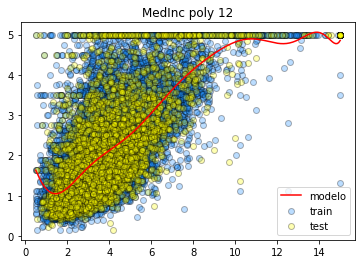

Coeficientes polinomio de grado 13: [ 0.00000000e+00 -6.87799577e-01 -5.51161082e-01  2.23115128e-01
  4.97908397e-01 -4.42535907e-01  1.70736122e-01 -3.87588515e-02
  5.67349312e-03 -5.52438696e-04  3.56628044e-05 -1.46888332e-06
  3.49886604e-08 -3.67040026e-10]
Error Train: 0.82056160808768
Error Test: 0.8386409150649679


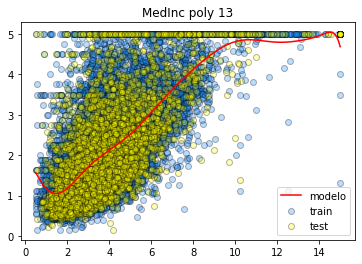

Coeficientes polinomio de grado 14: [ 0.00000000e+00  2.30093654e-03  6.23081624e-03  1.12568593e-02
  1.32185355e-02  5.59950476e-03 -6.68145216e-03  1.56085948e-03
  1.06415875e-05 -6.44538698e-05  1.28477723e-05 -1.26516973e-06
  7.01008675e-08 -2.09281448e-09  2.62886421e-11]
Error Train: 0.8215975913303754
Error Test: 0.8390876837912602


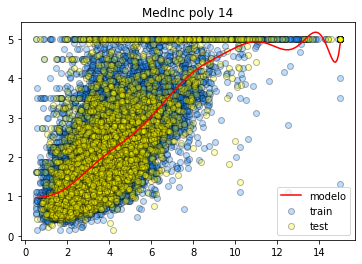

In [220]:
# 2. Graficar curvas de error acá.

train_error = []
test_error = []

degrees = range(1,15)

for degree in degrees:
    
    pf = PolynomialFeatures(degree)
    lr = LinearRegression() #(fit_intercept=False)  # el bias term ya está como feature por polynomial features

    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)
    
    print(f"Coeficientes polinomio de grado {degree}: {model['linearregression'].coef_}")

    y_train_f_pred = model.predict(X_train_f)
    y_test_f_pred = model.predict(X_test_f)
    
    train_err = np.sqrt(mean_squared_error(y_train, y_train_f_pred))
    test_err = np.sqrt(mean_squared_error(y_test, y_test_f_pred))
    
    print(f'Error Train: {train_err}')
    print(f'Error Test: {test_err}')

    train_error.append(train_err)
    test_error.append(test_err)
    
    x_start = min(np.min(X_train_f), np.min(X_test_f))
    x_end = max(np.max(X_train_f), np.max(X_test_f))
    x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
    plt.plot(x, model.predict(x), color="red", label="modelo")

    plt.scatter(X_train_f, y_train, facecolor="dodgerblue", label="train", alpha=0.3, edgecolor="k")
    plt.scatter(X_test_f, y_test, facecolor="yellow", label="test", alpha=0.3, edgecolor="k")
    plt.title(f'{feature} poly {degree}')
    plt.legend()
    plt.show()

In [221]:
train_error, test_error

([0.8343069638431359,
  0.8303528889782644,
  0.8235375424478714,
  0.8234390601553999,
  0.8234105963495097,
  0.8222453691247238,
  0.8208016305818732,
  0.8207024601063364,
  0.8207011034274057,
  0.8205692059829823,
  0.8205146613413151,
  0.820532356212224,
  0.82056160808768,
  0.8215975913303754],
 [0.8494105152406934,
  0.8469990676455047,
  0.8415078962002881,
  0.8414529867509859,
  0.8414109768244904,
  0.8406948779950044,
  0.8382100617547549,
  0.8379163241318572,
  0.8378980303715492,
  0.8380927894889869,
  0.8384127736828872,
  0.8382352807208546,
  0.8386409150649679,
  0.8390876837912602])

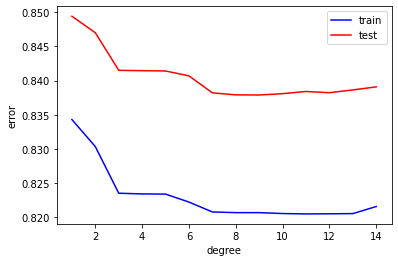

In [222]:
# 2. Graficar curvas de error acá.
plt.plot(degrees, train_error, color="blue", label="train")
plt.plot(degrees, test_error, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

In [223]:
# 4. Reconstruir mejor modelo acá y graficar.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [224]:
# 1. Resolver acá. Ayuda (con dos atributos):
#selector = (np.array(california['feature_names']) == 'HouseAge') | (np.array(california['feature_names']) == 'AveRooms')
selector = np.isin(california['feature_names'], ['AveRooms', 'MedInc'])

X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((16512, 2), (4128, 2))

In [225]:
# 2. Resolver acá.

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

train_rmse_list = []
test_rmse_list = []

degrees = [0, 1, 2, 3, 4]

for degree in degrees:
    
    pf = PolynomialFeatures(degree)
    lr = LinearRegression() #(fit_intercept=False)  # el bias term ya está como feature por polynomial features

    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train)
    
    #print(f"Coeficientes del modelo de polinomio {degree}: {model['linearregression'].coef_}")

    #y_train_fs_pred = model.predict(X_train_fs)
    #y_test_fs_pred = model.predict(X_test_fs)
    
    #train_rmse = np.sqrt(mean_squared_error(y_train, y_train_fs_pred)) * 1e4
    #test_rmse = np.sqrt(mean_squared_error(y_test, y_test_fs_pred)) * 1e4
    
    #print(f'Train RMSE: {train_rmse}')
    #print(f'Test RMSE: {test_rmse}')

    #train_rmse_list.append(train_rmse)
    #test_rmse_list.append(test_rmse)

ValueError: could not broadcast input array from shape (16512,2) into shape (16512,0)

In [ ]:
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [ ]:
plt.plot(degrees, train_rmse_list, color="blue", label="train")
plt.plot(degrees, test_rmse_list, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
